In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WMT (1).csv', index_col=0, parse_dates=True)
df = df.loc['2010-01-01':'2022-12-31']

In [27]:
def ssa_decomposition(data, window_length):
    # Create Hankel matrix
    L = window_length
    T = len(data)
    K = T - L + 1
    X = np.zeros((L, K))
    for i in range(K):
        X[:, i] = data[i:i+L]

    # Perform SVD on Hankel matrix
    U, S, V = np.linalg.svd(X)

    # Select principal components
    num_components = min(L, K)
    selected_components = U[:, :num_components]

    # Reconstruct time series using selected components
    reconstructed_series = np.zeros(T)
    for i in range(num_components):
        projection = np.dot(X.T, selected_components[:, i])
        component = np.reshape(selected_components[:, i], (L, 1))
        for j in range(K):
            reconstructed_series[j+i] += projection[j] * component[i]

    return reconstructed_series

In [28]:
# Split data into training and testing sets
train_size = int(len(df) * 0.7)
train_data = df['Close'].iloc[:train_size]
test_data = df['Close'].iloc[train_size:]


In [29]:

# Apply SSA algorithm on training set
window_length = 50
reconstructed_train = ssa_decomposition(train_data.values, window_length)


In [30]:

# Make predictions on testing set
reconstructed_test = ssa_decomposition(test_data.values, window_length)


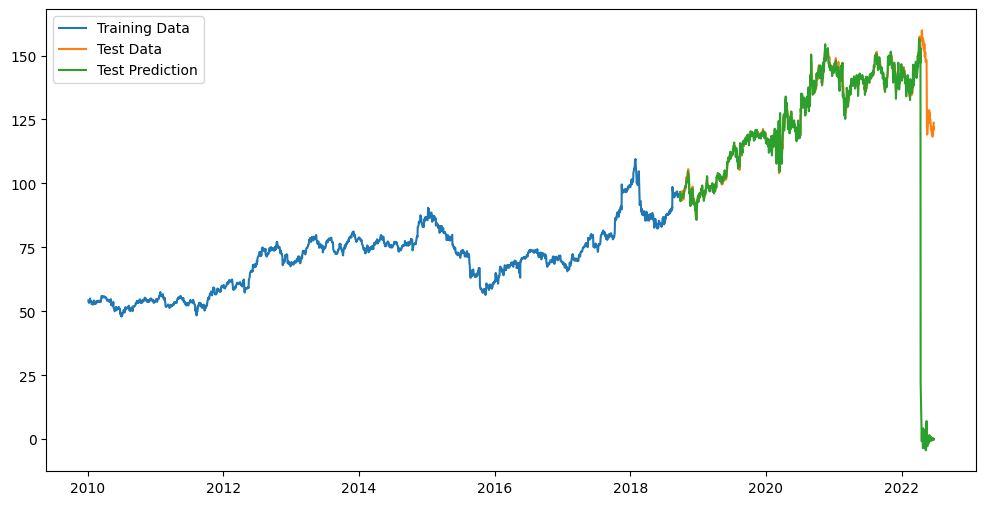

In [31]:

# Visualize the results
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, reconstructed_test, label='Test Prediction')
plt.legend()
plt.show()

In [32]:

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = np.sqrt(mean_squared_error(test_data[window_length:], reconstructed_test[window_length:]))
mae = mean_absolute_error(test_data[window_length:], reconstructed_test[window_length:])
mape = mape(test_data[window_length:], reconstructed_test[window_length:])

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

RMSE: 32.10586565777636
MAE: 8.501318724411997
MAPE: 6.277449402235681
